In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('C:/Users/Ashwini/Desktop/netflix1.csv')

In [13]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [14]:
data.shape

(8790, 10)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [16]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
unique = data['type'].unique()
print(unique)

['Movie' 'TV Show']


In [19]:
count_type_unique = data.groupby('type')['type'].value_counts().reset_index(name='show_count')
count_type_unique = count_type_unique.set_index('type')
count_type_unique

,show_count
type,
Movie,6126
TV Show,2664


In [20]:
title = np.unique(data['title'])
for i,movie in enumerate(title[:10]):
    print(f'{1+ i}.{movie}')
    

1.#Alive
2.#AnneFrank - Parallel Stories
3.#FriendButMarried
4.#FriendButMarried 2
5.#Roxy
6.#Rucker50
7.#Selfie
8.#Selfie 69
9.#blackAF
10.#cats_the_mewvie


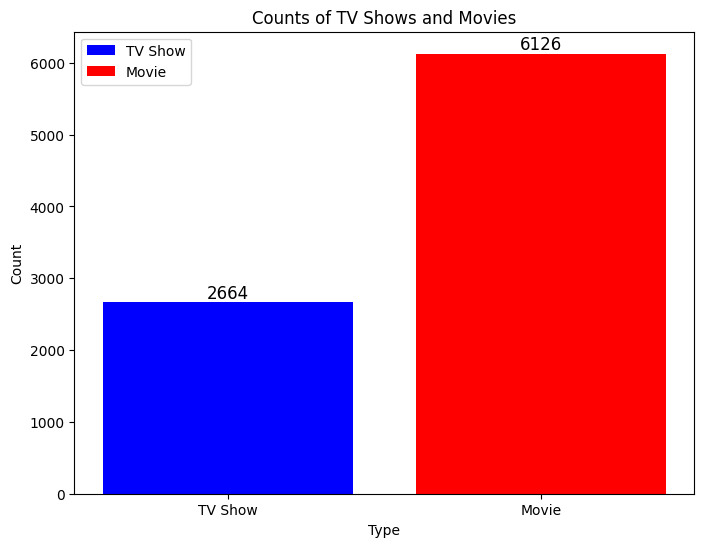

In [22]:
# select type and title of movie in each unique type value
#Group the data by 'type' and 'title' and count the occurrences
grouped_data = data.groupby('type').size().reset_index(name='count')

# Filter the grouped data for 'TV Show' and 'Movie'
tv_shows = grouped_data[grouped_data['type'] == 'TV Show']
movies = grouped_data[grouped_data['type'] == 'Movie']

# Create  a bar chart to visualize the counts
plt.figure(figsize=(8,6))
plt.bar(tv_shows['type'],tv_shows['count'],label='TV Show',color='blue')
plt.bar(movies['type'],movies['count'],label='Movie',color='red')

# Add labels and a legend
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Counts of TV Shows and Movies')
plt.legend()

# add count value inside the bars
for i,count in enumerate(tv_shows['count']):
    plt.text(i,count,str(count),ha='center',va='bottom',fontsize=12,color='black')
    
for i,count in enumerate(movies['count']):
    plt.text(1+i,count,str(count),ha='center',va='bottom',fontsize=12,color='black') 


In [23]:
# country
country = data['country'].unique()
country                                     # print country name
#count movie and Tv Show in each country
count_type_country = data.groupby('country')['type'].value_counts().reset_index(name='count')
count_type_country

,country,type,count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [24]:
# check value for each country
count_type_country = data.groupby(['country','type'])['type'].count().reset_index(name='show_count')
count_type_country

,country,type,show_count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [25]:
#write query to find top20 country
top20_country=count_type_country.query("`show_count` >= 81")
top20_country

,country,type,show_count
15,Canada,Movie,187
16,Canada,TV Show,84
30,Egypt,Movie,109
34,France,Movie,148
47,India,Movie,976
48,India,TV Show,81
49,Indonesia,Movie,84
59,Japan,Movie,87
60,Japan,TV Show,172
72,Mexico,Movie,90


In [26]:
# country with highest rating ration in type:[Tv Show,Movie]

group_data = data.groupby(['country','type','rating']).size().reset_index(name='count')

#tv show,
tv_show = group_data[group_data['type']=='TV Show']
#movie
movie = group_data[group_data['type']=='Movie']

#country with highest ratin
country_high_rating_tv = tv_show.loc[tv_show['count'].idxmax()]
country_high_rating_movie = movie.loc[movie['count'].idxmin()]
print(country_high_rating_tv)
print(country_high_rating_movie)

country    United States
type             TV Show
rating             TV-MA
count                343
Name: 516, dtype: object
country    Argentina
type           Movie
rating            PG
count              1
Name: 1, dtype: object


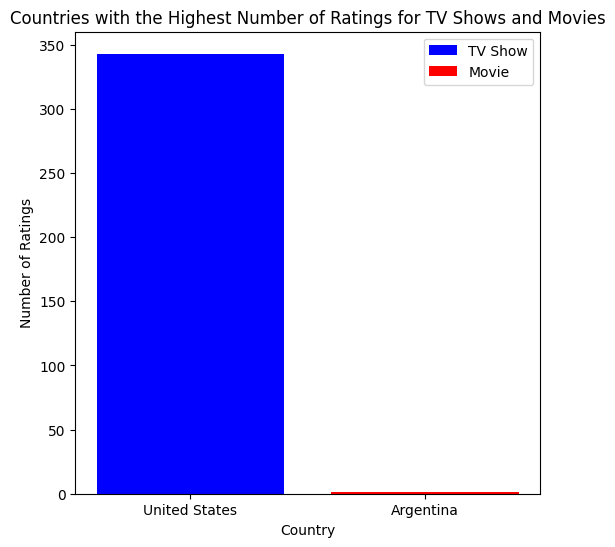

In [27]:
# Create a bar plot to visualize the results
plt.figure(figsize=(6, 6))
plt.bar(country_high_rating_tv['country'], country_high_rating_tv['count'], label='TV Show', color='blue')
plt.bar(country_high_rating_movie['country'], country_high_rating_movie['count'], label='Movie', color='red')

# Add labels and a legend
plt.xlabel('Country')
plt.ylabel('Number of Ratings')
plt.title('Countries with the Highest Number of Ratings for TV Shows and Movies')
plt.legend()

# Show the plot
plt.show()

In [28]:
# check the director attributes
director = data['director'].unique()
#print(director)
count_director = pd.DataFrame(data.groupby('director')[['title','type']].value_counts())
count_director


count
director            title                 type        
A. L. Vijay         Abhinetri             Movie      1
                    Watchman              Movie      1
A. Raajdheep        Asura Guru            Movie      1
A. Salaam           Salaakhen             Movie      1
A.R. Murugadoss     Spyder                Movie      1
...                                                ...
Óskar Thór Axelsson Ég man þig            Movie      1
Ömer Faruk Sorak    G.O.R.A               Movie      1
                    Aşk Tesadüfleri Sever Movie      1
Şenol Sönmez        Hayat Öpücügü         Movie      1
                    Kill Me If You Dare   Movie      1

[8787 rows x 1 columns]

In [29]:
# Count TV shows and movies for each director
director_counts = data.groupby('director')['type'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
director_counts.rename(columns={'Movie': 'Movie Count', 'TV Show': 'TV Show Count'}, inplace=True)

# Reset the index to make 'director' a column
director_counts.reset_index(inplace=True)

# Print the DataFrame
print(director_counts)

type             director  Movie Count  TV Show Count
0             A. L. Vijay            2              0
1            A. Raajdheep            1              0
2               A. Salaam            1              0
3         A.R. Murugadoss            2              0
4         Aadish Keluskar            1              0
...                   ...          ...            ...
4523          Çagan Irmak            1              0
4524     Ísold Uggadóttir            1              0
4525  Óskar Thór Axelsson            1              0
4526     Ömer Faruk Sorak            2              0
4527         Şenol Sönmez            2              0

[4528 rows x 3 columns]


In [30]:
# Filter the DataFrame for TV shows
tv_shows = data[data['type'] == 'TV Show']

# Create a DataFrame to count TV shows for each director
tv_show_director_counts = tv_shows['director'].value_counts().reset_index()
tv_show_director_counts.columns = ['Director', 'TV Show Count']

# Print the DataFrame
print(tv_show_director_counts)

                              Director  TV Show Count
0                            Not Given           2415
1                  Alastair Fothergill             14
2         Mark Thornton, Todd Kauffman              5
3                          Stan Lathan              3
4                          Hsu Fu-chun              2
..                                 ...            ...
221     Chang Chin-jung, Chen Rong-hui              1
222  Thierry Demaizière, Alban Teurlai              1
223                        Manolo Caro              1
224                   Pavel Kostomarov              1
225    Krysia Plonka, Kristian Mercado              1

[226 rows x 2 columns]


In [31]:
# Filter the DataFrame for Movie 
movies = data[data['type'] == 'Movie']

# Create a DataFrame to count Movie for each director
tv_show_director_counts = movies['director'].value_counts().reset_index()
tv_show_director_counts.columns = ['Director', 'TV Show Count']

# Print the DataFrame
print(tv_show_director_counts)

                    Director  TV Show Count
0                  Not Given            173
1              Rajiv Chilaka             19
2     Raúl Campos, Jan Suter             18
3                Suhas Kadav             16
4               Marcus Raboy             15
...                      ...            ...
4350       Richard Loncraine              1
4351             Pia Sukanya              1
4352             Yann Gozlan              1
4353             Lukas Dhont              1
4354         Kirsten Johnson              1

[4355 rows x 2 columns]


In [32]:
#type with rating
group_data = data.groupby(['type','rating']).size().reset_index(name='count')
#Sort the value
sort_data = group_data.sort_values(by=['type','rating'],ascending=[True,True])
sort_data

,type,rating,count
0,Movie,G,41
1,Movie,NC-17,3
2,Movie,NR,75
3,Movie,PG,287
4,Movie,PG-13,490
5,Movie,R,797
6,Movie,TV-14,1427
7,Movie,TV-G,126
8,Movie,TV-MA,2062
9,Movie,TV-PG,540


In [33]:
# rating by type = movie
movie_rating = data.groupby(['rating','type'])['rating'].count().reset_index(name='movie_rating')
movie_rating = movie_rating.set_index('rating')
movie_rating

filter = movie_rating['type'] =='Movie'

movie_rating.where(filter,inplace=True)
movie_rating = movie_rating.dropna()
movie_rating

,type,movie_rating
rating,,
G,Movie,41.0
NC-17,Movie,3.0
NR,Movie,75.0
PG,Movie,287.0
PG-13,Movie,490.0
R,Movie,797.0
TV-14,Movie,1427.0
TV-G,Movie,126.0
TV-MA,Movie,2062.0


In [34]:
# rating by type = Tv Show

movie_rating = data.groupby(['rating','type'])['rating'].count().reset_index(name='movie_rating')
movie_rating = movie_rating.set_index('rating')
movie_rating

filter = movie_rating['type'] =='TV Show'

movie_rating.where(filter,inplace=True)
movie_rating = movie_rating.dropna()
movie_rating

,type,movie_rating
rating,,
NR,TV Show,4.0
R,TV Show,2.0
TV-14,TV Show,730.0
TV-G,TV Show,94.0
TV-MA,TV Show,1143.0
TV-PG,TV Show,321.0
TV-Y,TV Show,175.0
TV-Y7,TV Show,194.0
TV-Y7-FV,TV Show,1.0


In [35]:
# type and calculate with maximum duration
max_duration = data.groupby('type')['duration'].max().reset_index()

#highest duartion
highest_duration = max_duration[max_duration['duration']==max_duration['duration'].max()]
lowest_duration = max_duration[max_duration['duration']==max_duration['duration'].min()]

print(highest_duration)
print(lowest_duration)

    type duration
0  Movie   99 min
      type   duration
1  TV Show  9 Seasons


In [36]:
#grouped by listed_In and type
listed = data.groupby(['listed_in','type'])[ 'type'].count().reset_index(name='count')
listed

,listed_in,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [37]:
#dataset columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [38]:
#release year
release = data['release_year'].shape
print(release)
unique_value = data['release_year'].unique()
unique_value

(8790,)


array([2020, 2021, 1993, 2019, 2013, 2014, 2018, 1998, 2010, 2017, 1997,
       1996, 1975, 1978, 1983, 1987, 2012, 2001, 2002, 2003, 2004, 2011,
       2008, 2009, 2007, 2005, 2006, 2016, 1994, 2015, 1982, 1989, 1990,
       1991, 1999, 1986, 1984, 1980, 1961, 2000, 1995, 1985, 1925, 1992,
       1976, 1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1960, 1974, 1966, 1971, 1962, 1969, 1977, 1967, 1968,
       1965, 1945, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

Text(0.5, 1.0, 'Type OF Show')

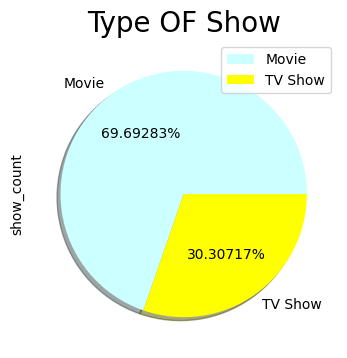

In [39]:
# percentage of types of show
colors = ['#CCFFFF','#FFFF00']
count_type_unique.plot.pie(y='show_count',autopct='%.5f%%', shadow=True, legend= 'type' , figsize=(5,4),colors=colors)
plt.title('Type OF Show', fontsize=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Egypt'),
  Text(2, 0, 'France'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'Nigeria'),
  Text(8, 0, 'Not Given'),
  Text(9, 0, 'Pakistan'),
  Text(10, 0, 'South Korea'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Turkey'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

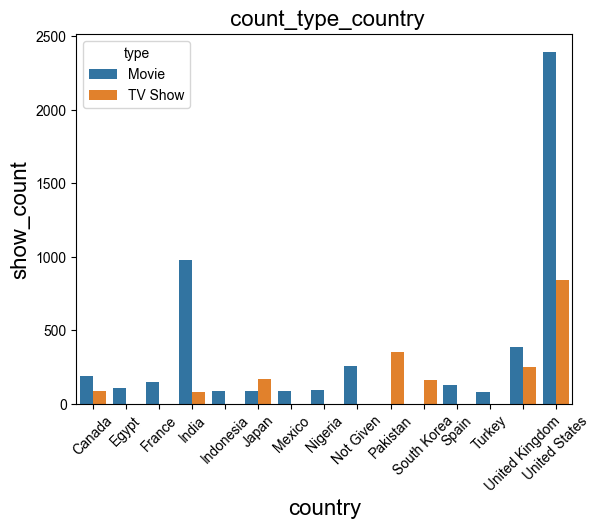

In [40]:
sns.barplot(x =top20_country.reset_index()['country'], y=top20_country.reset_index()['show_count'],
            hue =  top20_country.reset_index()['type']);
plt.title(' count_type_country', fontsize=16)
plt.xlabel('country', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 45)